In [1]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [2]:
!pip install keras

In [3]:
from keras.models import Sequential

In [4]:
!pip install tensorflow

In [5]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE]
def brightness(img):
  value = random.uniform(0.5,2)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv = np.array(hsv, dtype = np.float64)
  hsv[:, :, 1] = hsv[:, :, 1]*value
  hsv[:, :, 1][hsv[:, :, 1]>255] = 255
  hsv[:, :, 2] = hsv[:, :, 2]*value
  hsv[:, :, 2][hsv[:, :, 2]>255] = 255
  hsv = np.array(hsv, dtype = np.uint8)
  img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/Casting")
resultant="/content/augmentedimages"


In [10]:
import os
import random
import cv2
items=os.listdir(directory)
classes=[]
count=0
images=[]
labels=[]
for i in items:
  i1=0
  print(i)
  classes.append(i)
  path1=f"{directory}/{i}"
  a=random.randint(5,10)
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  k=i.split(".")[0]
  cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
  i1+=1
  while a!=0:
    img=cv2.rotate(img,lt[random.randint(0,2)])
    images.append(img)
    cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
    i1+=1
    labels.append(count)
    if a%2==0:
      img=brightness(img)
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
      i1+=1
      labels.append(count)
    a-=1
  count+=1
images=np.array(images)
labels=np.array(labels)

cast_def_0_997.jpeg
cast_ok_0_998.jpeg


In [11]:
images.shape

(25, 224, 224, 3)

In [12]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import*
from keras.applications.mobilenet import MobileNet, preprocess_input

In [13]:
model = MobileNet(weights="imagenet")
for i in model.layers:
  i.trainable = False

17225924/17225924 [==============================] - 2s 0us/step


In [14]:
len(model.layers)

91

In [15]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transferMobileNet = Sequential()
transferMobileNet.add(base_model)
transferMobileNet.add(Flatten())
transferMobileNet.add(Dense(1024, activation="relu"))
transferMobileNet.add(Dense(512, activation="relu"))
transferMobileNet.add(Dense(10, activation="softmax"))
transferMobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transferMobileNet.summary()







9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 67014218 (255.64 MB)
Trainable params: 669801

In [17]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if (logs.get('accuracy') > 0.99):
            print("\nReached 99.00%% accuracy, so stopping training!!")
            self.model.stop_training = True

callbacks = myCallback()

In [18]:
transferMobileNet.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferMobileNet.fit(images,labels,epochs=100,callbacks=[callbacks])
transferMobileNet.evaluate(images,labels)

Epoch 1/100
1/1 [==============================] - 22s 22s/step - loss: 2.7687 - accuracy: 0.0800
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 2.6683 - accuracy: 0.8000
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 104.5877 - accuracy: 0.5200
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.0517e-07 - accuracy: 1.0000call

Reached 99.00%% accuracy, so stopping training!!
1/1 [==============================] - 2s 2s/step - loss: 32.6620 - accuracy: 0.4800


[32.661983489990234, 0.47999998927116394]

In [20]:
def predict(i,transferResNet,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferMobileNet.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)
  classes=myCallback()

1/1 [==============================] - 1s 1s/step


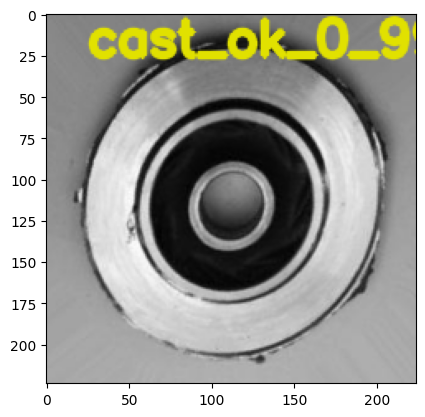

In [22]:
predict("cast_def_0_997.jpeg",transferMobileNet,classes)

1/1 [==============================] - 0s 92ms/step


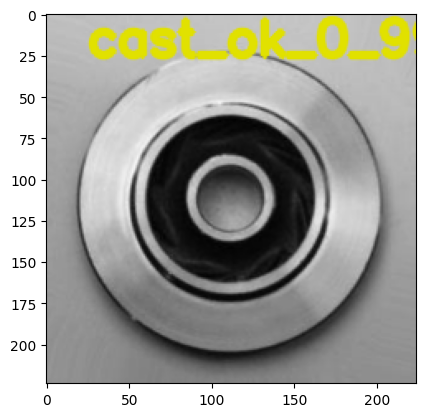

In [23]:
predict("cast_ok_0_998.jpeg",transferMobileNet,classes)